In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
class CompositeMaterialAnalysis:
    def __init__(self, mean_strength, std_dev, num_batches=5, samples_per_batch=6):
        self.mean_strength = mean_strength
        self.std_dev = std_dev
        self.num_batches = num_batches
        self.samples_per_batch = samples_per_batch
        
        # Environmental and manufacturing factors
        self.ke = 0.85  # Environmental knockdown
        self.km = 0.90  # Manufacturing knockdown
        self.kd = 0.80  # Damage tolerance knockdown
        
        # Generate synthetic test data
        self.test_data = self._generate_test_data()
        
    def _generate_test_data(self):
        """Generate synthetic test data with batch-to-batch variation"""
        data = []
        for _ in range(self.num_batches):
            # Add batch-to-batch variation
            batch_mean = np.random.normal(self.mean_strength, self.std_dev * 0.5)
            batch_data = np.random.normal(batch_mean, self.std_dev, self.samples_per_batch)
            data.extend(batch_data)
        return np.array(data)
    
    def calculate_basis_values(self):
        """Calculate A-basis and B-basis values"""
        n = len(self.test_data)
        mean = np.mean(self.test_data)
        std = np.std(self.test_data, ddof=1)
        
        # A-basis (99% probability with 95% confidence)
        k_a = 2.858  # k-factor for n=30, can be looked up from tables
        a_basis = mean - k_a * std
        
        # B-basis (90% probability with 95% confidence)
        k_b = 1.777  # k-factor for n=30
        b_basis = mean - k_b * std
        
        return a_basis, b_basis
    
    def calculate_design_values(self, qualification_value):
        """Calculate design values using knockdown factors"""
        return qualification_value * self.ke * self.km * self.kd
    
    def calculate_acceptance_values(self):
        """Calculate acceptance values based on process capability"""
        mean = np.mean(self.test_data)
        std = np.std(self.test_data)
        return mean - 3 * std
    
    def plot_distribution(self):
        """Plot the distribution of values"""
        plt.figure(figsize=(12, 6))
        
        # Plot histogram of test data
        sns.histplot(self.test_data, stat='density', alpha=0.5, label='Test Data')
        
        # Plot normal distribution curve
        x = np.linspace(min(self.test_data), max(self.test_data), 100)
        y = stats.norm.pdf(x, np.mean(self.test_data), np.std(self.test_data))
        plt.plot(x, y, 'r-', label='Normal Distribution')
        
        # Calculate and plot various values
        a_basis, b_basis = self.calculate_basis_values()
        design_value = self.calculate_design_values(b_basis)
        acceptance_value = self.calculate_acceptance_values()
        
        # Add vertical lines for different values
        plt.axvline(b_basis, color='g', linestyle='--', label='B-Basis (Qualification)')
        plt.axvline(design_value, color='b', linestyle='--', label='Design Value')
        plt.axvline(acceptance_value, color='r', linestyle='--', label='Acceptance Value')
        
        plt.title('Distribution of Composite Material Properties')
        plt.xlabel('Strength (MPa)')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()


Analysis Results:
Mean Strength: 980.6 MPa
Standard Deviation: 59.5 MPa

Qualification Values:
A-Basis: 807.6 MPa
B-Basis: 873.0 MPa

Design Value: 534.3 MPa
Acceptance Value: 802.0 MPa


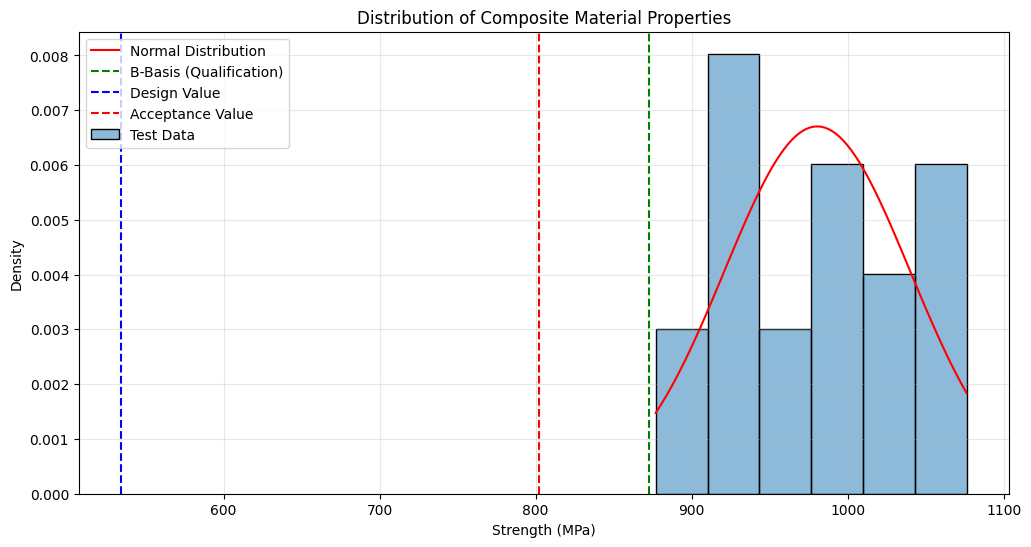

In [ ]:
# Initialize with mean strength of 1000 MPa and standard deviation of 50 MPa
analysis = CompositeMaterialAnalysis(mean_strength=1000, std_dev=50)

# Calculate values
a_basis, b_basis = analysis.calculate_basis_values()
design_value = analysis.calculate_design_values(b_basis)
acceptance_value = analysis.calculate_acceptance_values()

print(f"\nAnalysis Results:")
print(f"Mean Strength: {np.mean(analysis.test_data):.1f} MPa")
print(f"Standard Deviation: {np.std(analysis.test_data):.1f} MPa")
print(f"\nQualification Values:")
print(f"A-Basis: {a_basis:.1f} MPa")
print(f"B-Basis: {b_basis:.1f} MPa")
print(f"\nDesign Value: {design_value:.1f} MPa")
print(f"Acceptance Value: {acceptance_value:.1f} MPa")

# Plot distribution
analysis.plot_distribution()